In [1]:
import itertools as i
import json as j
import math as m
import os
import pathlib as p
import pprint as pp
import random as r

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as s
import seaborn as sns

In [2]:
np.random.seed(42)

HOME_PATH = p.Path(os.getcwd())
DATA_PATH = HOME_PATH.joinpath('data')

## _Dataset_

O _Dataset_ utilizado é o ___Breast Cancer Wisconsin (Diagnostic) Data Set___, com informações de imagens digitalizadas de tumores em seios.

As _features_ presentes no conjunto de dados são as medidas e descrições dessas massas, levando a identificação sobre o tumor ser benigno ou maligno.

O _dataset_ pode ser encontrado no [Kaggle](https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data).

In [3]:
data_file_path = DATA_PATH.joinpath('data.csv')

data = pd.read_csv(data_file_path)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [6]:
# Remapeia os labels de classificação
data['diagnosis'] = data['diagnosis'].map({'B': 0, 'M': 1})

# Separa os casos negativos e positivos
negative = data[data['diagnosis'] == 0]
positive = data[data['diagnosis'] == 1]

## _Sample_ e _Sampling_

Nesta seção, será realizada a etapa __A__ do trabalho.

A _feature_ ___radius_mean___ será utilizada para isso, a qual representa o raio médio de tumores.

### Dados Originais

In [7]:
# Calcula média e desvio padrão dos dados originais
original_population = data['radius_mean']
original_population_mean = original_population.mean()
original_population_std = original_population.std()

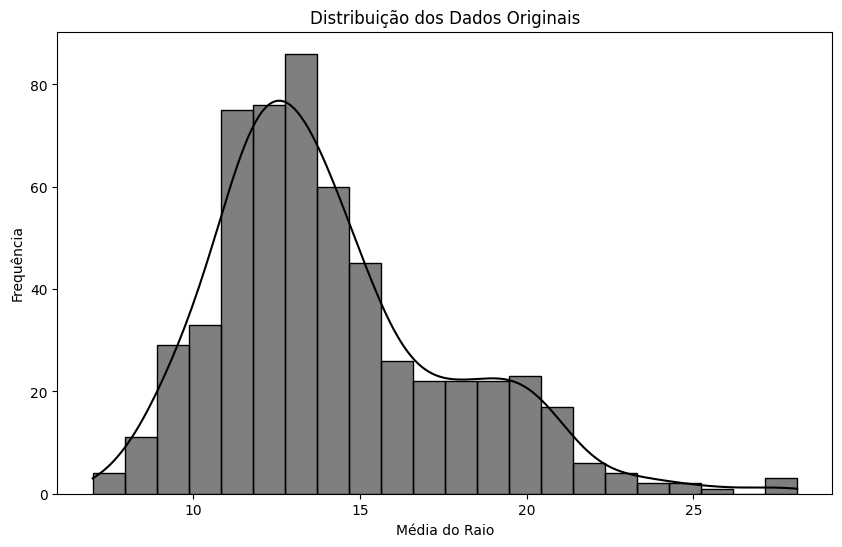

In [8]:
# Apresentação da distribuição dos dados originais
plt.figure(figsize=(10, 6))
sns.histplot(original_population, kde=True, color='black')
plt.title('Distribuição dos Dados Originais')
plt.xlabel('Média do Raio')
plt.ylabel('Frequência')
plt.show()

### Dados Artificiais

In [9]:
# Criação de uma população artificial
artificial_population_size = 1000
artificial_population = np.random.normal(original_population_mean, original_population_std, artificial_population_size)

In [10]:
# Calcula média e desvio padrão dos dados artificiais
artificial_population_mean = artificial_population.mean()
artificial_population_std = artificial_population.std()

### Sample

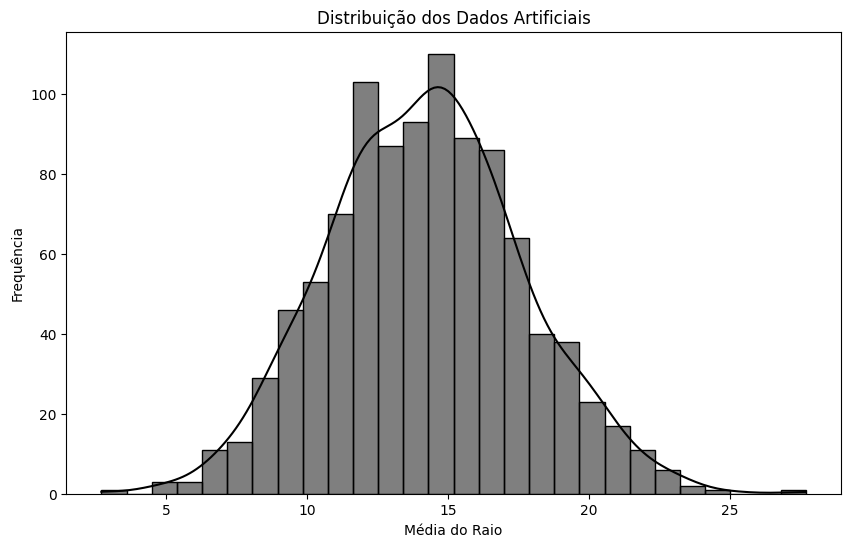

In [11]:
# Apresentação da distribuição dos dados artificiais
plt.figure(figsize=(10, 6))
sns.histplot(artificial_population, kde=True, color='black')
plt.title('Distribuição dos Dados Artificiais')
plt.xlabel('Média do Raio')
plt.ylabel('Frequência')
plt.show()

In [12]:
# Realiza sample dos dados artificiais
artificial_sample_size = 200
sample = np.random.choice(artificial_population, size=artificial_sample_size, replace=False)
print(artificial_sample_size)

200


In [13]:
# Calcula média e desvio padrão dos dados artificiais
sample_mean = sample.mean()
sample_std = sample.std()

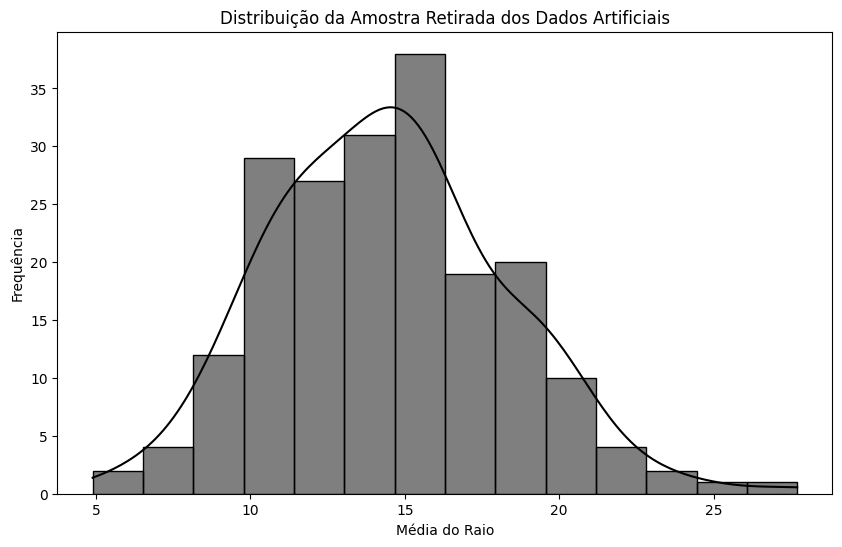

In [14]:
# Apresentação da distribuição da amostra dos dados artificiais
plt.figure(figsize=(10, 6))
sns.histplot(sample, kde=True, color='black')
plt.title('Distribuição da Amostra Retirada dos Dados Artificiais')
plt.xlabel('Média do Raio')
plt.ylabel('Frequência')
plt.show()

### Sampling

In [15]:
# Realiza sampling dos dados artificiais
artificial_sampling_size = 30
artificial_sampling_quantity = 200
sampling_means = list()

for _ in range(artificial_sampling_quantity):
    current_sample = np.random.choice(artificial_population, size=artificial_sampling_size, replace=False)
    current_sample_mean = np.mean(current_sample)
    sampling_means.append(current_sample_mean)

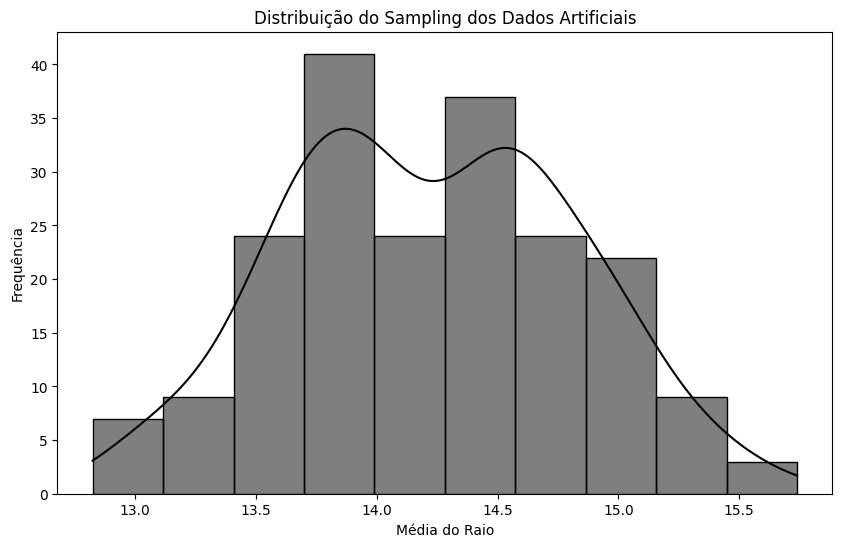

In [16]:
# Apresentação da distribuição do sampling dos dados artificiais
plt.figure(figsize=(10, 6))
sns.histplot(sampling_means, kde=True, color='black')
plt.title('Distribuição do Sampling dos Dados Artificiais')
plt.xlabel('Média do Raio')
plt.ylabel('Frequência')
plt.show()

### Eventos Possíveis e Cálculo de Probabilidades

#### Evento 1: Probabilidade de uma média de raio ser menor que 10

In [17]:
prob_original_data = s.norm.cdf(10, loc=original_population_mean, scale=original_population_std)
prob_artificial_data = s.norm.cdf(10, loc=artificial_population_mean, scale=artificial_population_std)
prob_sample = s.norm.cdf(10, loc=sample_mean, scale=sample_std)

print(f"Probabilidade segundo os dados originais: {prob_original_data:.2%}.")
print(f"Probabilidade segundo os dados artificiais: {prob_artificial_data:.2%}.")
print(f"Probabilidade segundo a amostra dos dados artificiais: {prob_sample:.2%}.")

Probabilidade segundo os dados originais: 12.08%.
Probabilidade segundo os dados artificiais: 11.19%.
Probabilidade segundo a amostra dos dados artificiais: 12.00%.


#### Evento 2: Probabilidade de uma média de raio de 30 pessoas ser maior que 15

In [18]:
# Utilizando a fórmula que usa a média da população original do sampling mais o desvio padrão dela dividido pelo tamanho das amostras
value_sampling = (15 - artificial_population_mean) / (artificial_population_std / m.sqrt(artificial_sampling_size))

# Calcula probabilidade a partir do valor obtido de acordo com o evento pedido
prob_sampling = 1 - s.norm.cdf(value_sampling)

print(f"Probabilidade segundo o sampling de dados artificiais: {prob_sampling:.2%}.")

Probabilidade segundo o sampling de dados artificiais: 10.07%.


## TLC e Distribuição Gama

Nesta seção, será realizada a etapa __B__ do trabalho.

In [19]:
# Define os parâmetros da distribuição
gamma_shape = 2
gamma_scale = 0.5

In [20]:
# Cria população para a distribuição
gamma_population_size = 10000
gamma_population = s.gamma.rvs(a=gamma_shape, scale=1/gamma_scale, size=gamma_population_size)

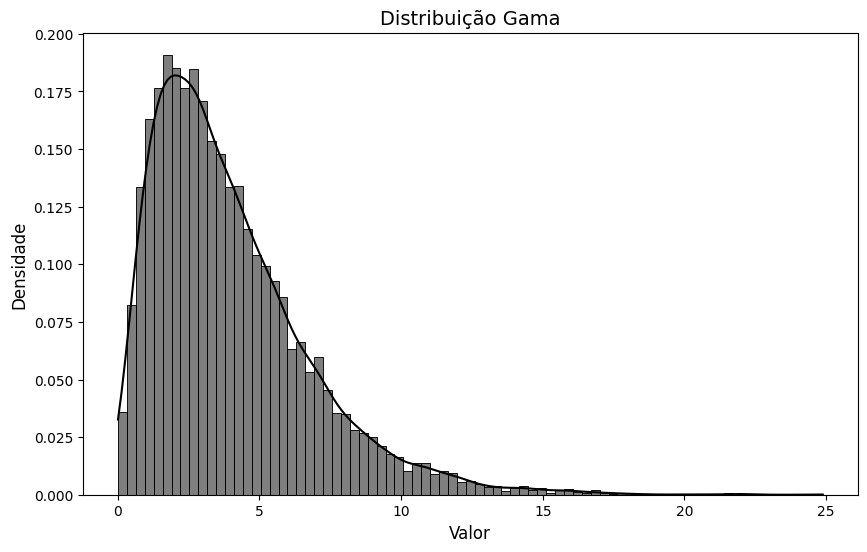

In [21]:
# Mostra distribuição Gama em gráfico
plt.figure(figsize=(10, 6))
sns.histplot(gamma_population, kde=True, color='black', stat='density')
plt.title(f'Distribuição Gama', fontsize=14)
plt.xlabel('Valor', fontsize=12)
plt.ylabel('Densidade', fontsize=12)
plt.show()

In [22]:
# Prepara estruturas para receber amostras de diferentes tamanhos
sample_sizes = (10, 30, 50, 100)
samples_quantity = 1000

samples = {sample_size: list() for sample_size in sample_sizes}

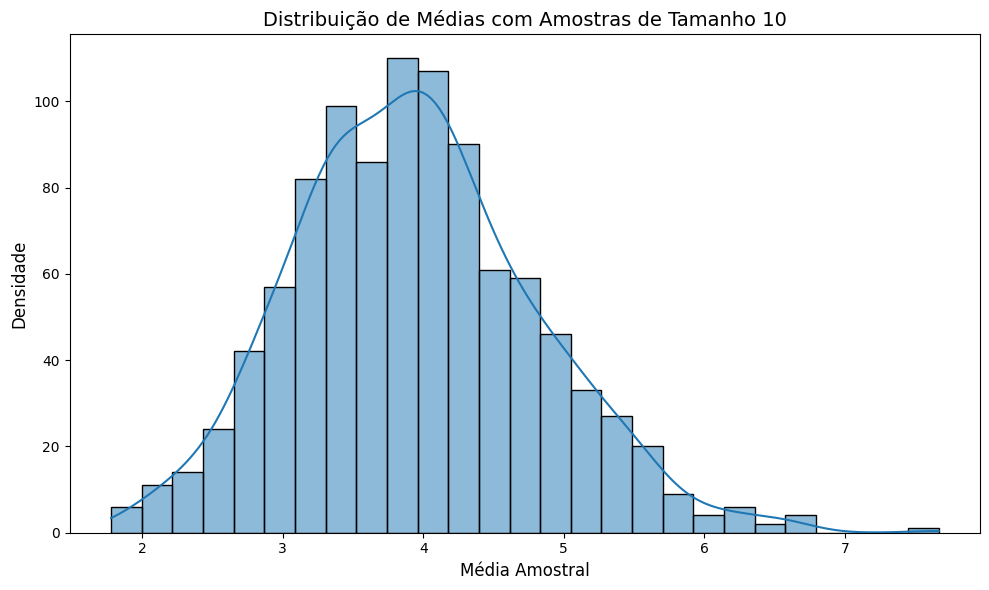

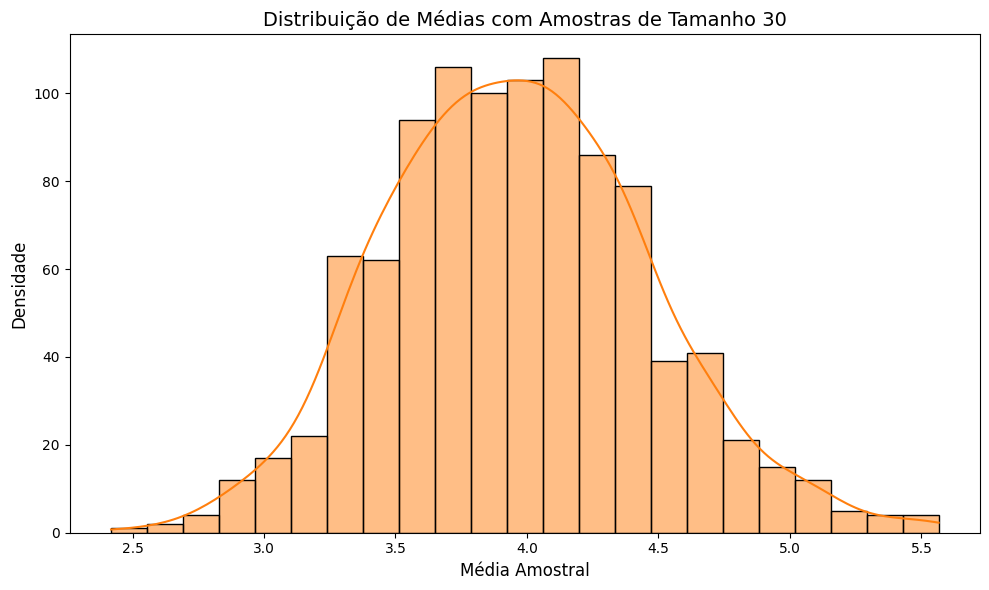

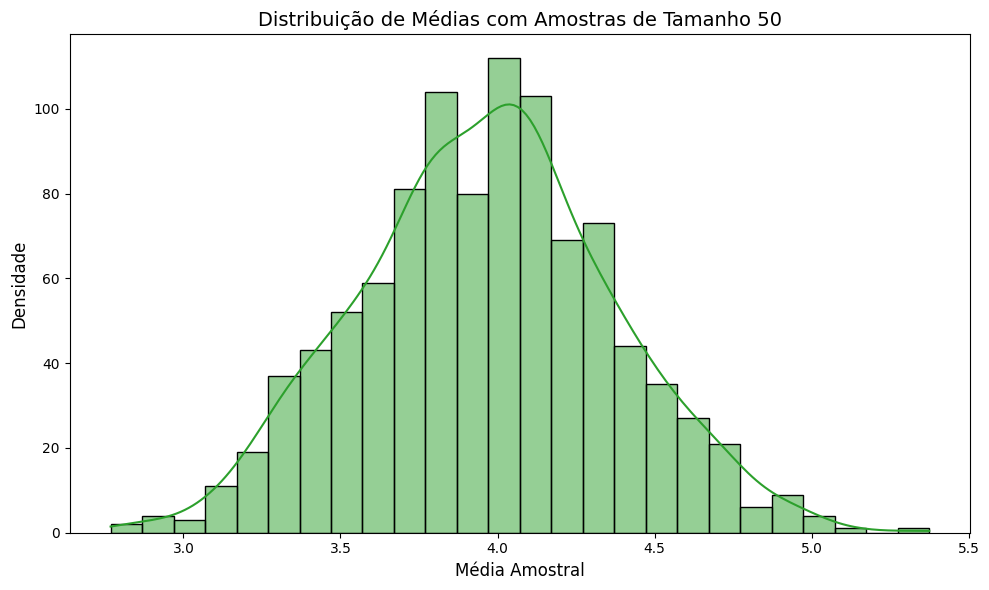

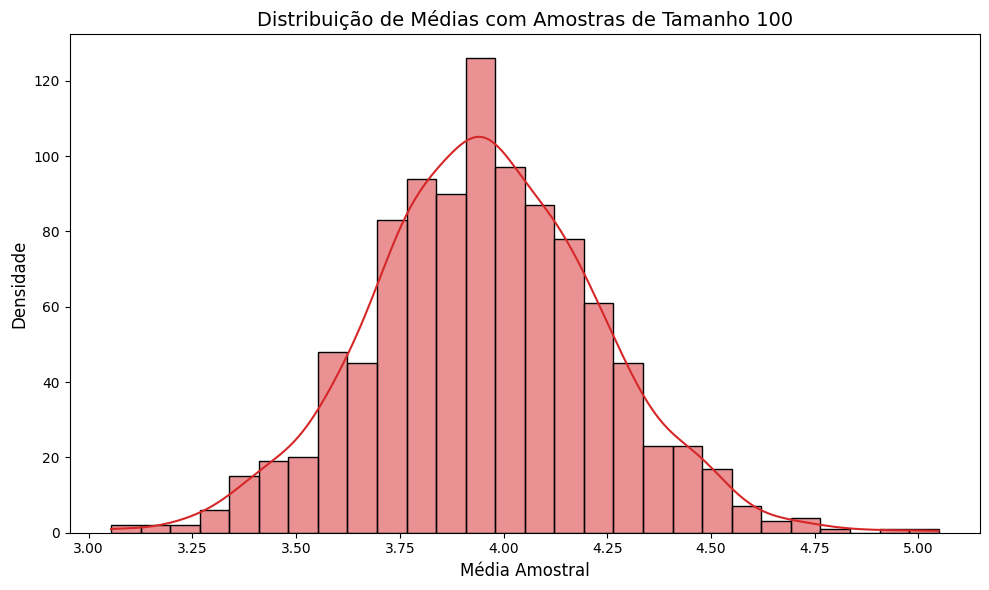

In [23]:
# Coleta amostras de diferentes tamanhos, salva em dicionário e mostra as distribuições
for sample_size in sample_sizes:
    for _ in range(samples_quantity):
        sample = np.random.choice(gamma_population, size=sample_size, replace=False)
        sample_mean = sample.mean()
        samples[sample_size].append(sample_mean)

    plt.figure(figsize=(10, 6))
    sns.histplot(samples[sample_size], kde=True, color=f'C{sample_sizes.index(sample_size)}')
    plt.title(f'Distribuição de Médias com Amostras de Tamanho {sample_size}', fontsize=14)
    plt.xlabel('Média Amostral', fontsize=12)
    plt.ylabel('Densidade', fontsize=12)
    plt.tight_layout()
    plt.show()

### Análise

Comparando os gráficos, é possível ver com clareza a centralização das distribuições de acordo com o aumento do tamanho das amostras.

Isso fica muito evidente ao comparar os valores nos extremos dos gráficos: no primeiro, com amostras de tamanho 10, as pontas do gráfico contém valores por volta de 1 e 8; nos gráficos seguintes, esses valores diminuem até chegar no último gráfico - com amostra de tamanho 100 - no qual os extremos são petro de 3.25 e 5, provando a concentração das amostras perto da média no centro.

## _P-Value_

Nesta seção, será realizada a etapa __C__ do trabalho.

In [24]:
# Cria estrutura com possíveis resultados ao jogar uma moeda
flip_coin_outcomes = ('H', 'T')
number_of_flips = 5
desired_outcome = ('H', 'H', 'H', 'T', 'H')
desired_outcome_heads = desired_outcome.count('H')
desired_outcome_tails = desired_outcome.count('T')

In [25]:
# Cria todas as combinações possíveis
combinations = list(i.product(flip_coin_outcomes, repeat=number_of_flips))
number_of_combinations = len(combinations)

pp.pprint(combinations)

[('H', 'H', 'H', 'H', 'H'),
 ('H', 'H', 'H', 'H', 'T'),
 ('H', 'H', 'H', 'T', 'H'),
 ('H', 'H', 'H', 'T', 'T'),
 ('H', 'H', 'T', 'H', 'H'),
 ('H', 'H', 'T', 'H', 'T'),
 ('H', 'H', 'T', 'T', 'H'),
 ('H', 'H', 'T', 'T', 'T'),
 ('H', 'T', 'H', 'H', 'H'),
 ('H', 'T', 'H', 'H', 'T'),
 ('H', 'T', 'H', 'T', 'H'),
 ('H', 'T', 'H', 'T', 'T'),
 ('H', 'T', 'T', 'H', 'H'),
 ('H', 'T', 'T', 'H', 'T'),
 ('H', 'T', 'T', 'T', 'H'),
 ('H', 'T', 'T', 'T', 'T'),
 ('T', 'H', 'H', 'H', 'H'),
 ('T', 'H', 'H', 'H', 'T'),
 ('T', 'H', 'H', 'T', 'H'),
 ('T', 'H', 'H', 'T', 'T'),
 ('T', 'H', 'T', 'H', 'H'),
 ('T', 'H', 'T', 'H', 'T'),
 ('T', 'H', 'T', 'T', 'H'),
 ('T', 'H', 'T', 'T', 'T'),
 ('T', 'T', 'H', 'H', 'H'),
 ('T', 'T', 'H', 'H', 'T'),
 ('T', 'T', 'H', 'T', 'H'),
 ('T', 'T', 'H', 'T', 'T'),
 ('T', 'T', 'T', 'H', 'H'),
 ('T', 'T', 'T', 'H', 'T'),
 ('T', 'T', 'T', 'T', 'H'),
 ('T', 'T', 'T', 'T', 'T')]


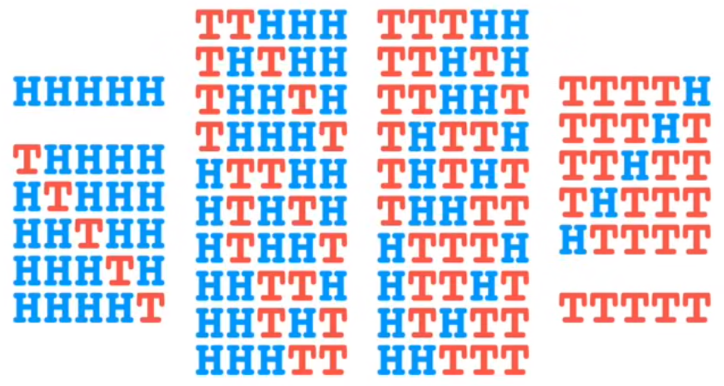

### Primeiro Passo: Probabilidade de ter o Resultado Desejado

In [26]:
# Conta-se a quantidade de combinações nas quais existem 4 caras e 1 coroa
ocurrences = 0

for combination in combinations:
    combination_heads = combination.count('H')
    combination_tails = combination.count('T')
    if combination_heads == desired_outcome_heads and combination_tails == desired_outcome_tails:
        ocurrences += 1

# Após a contagem, calcula-se a probabilidade
prob_step_1 = ocurrences / number_of_combinations

print(prob_step_1)

0.15625


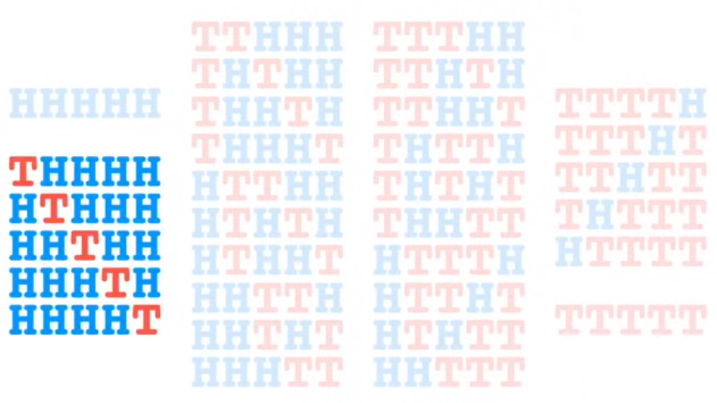

### Segundo Passo: Probabilidade de ter um Resultado tão Raro quanto o Esperado

In [27]:
# Conta-se a quantidade de combinações nas quais existem 4 coroas e 1 cara
ocurrences = 0

for combination in combinations:
    combination_heads = combination.count('H')
    combination_tails = combination.count('T')
    if combination_heads == 1 and combination_tails == 4:
        ocurrences += 1

# Após a contagem, calcula-se a probabilidade
prob_step_2 = ocurrences / number_of_combinations

print(prob_step_2)

0.15625


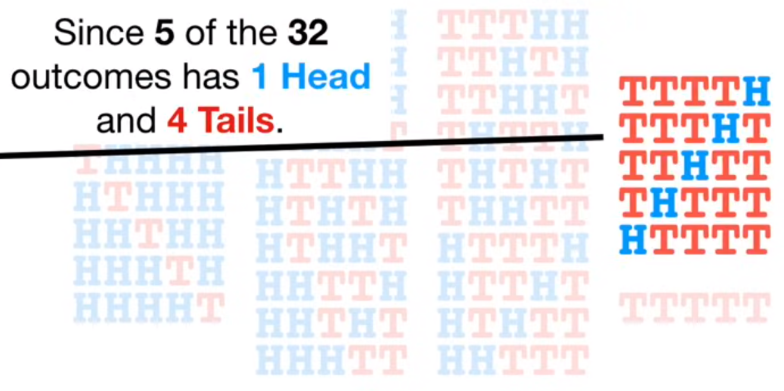

### Terceiro Passo: Probabilidade de ter um Resultado mais Raro que o Esperado

In [28]:
# Conta-se a quantidade de combinações nas quais existem 5 coroas ou 5 caras
ocurrences = 0

for combination in combinations:
    combination_heads = combination.count('H')
    combination_tails = combination.count('T')
    if combination_heads == 5 or combination_tails == 5:
        ocurrences += 1

# Após a contagem, calcula-se a probabilidade
prob_step_3 = ocurrences / number_of_combinations

print(prob_step_3)

0.0625


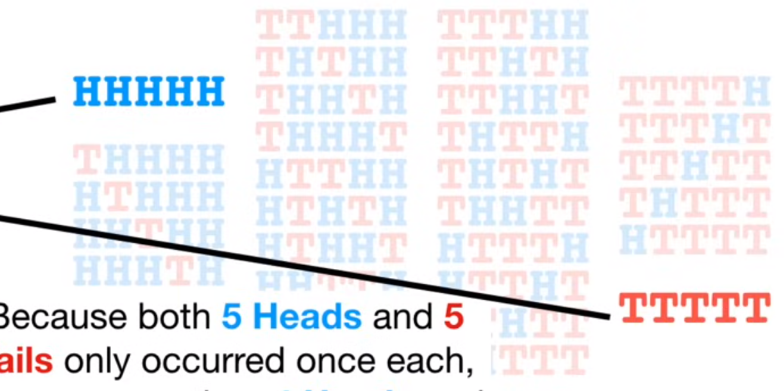

### Quarto Passo: Soma das Probabilidades para Chegar ao _P-Value_

In [29]:
p_value = prob_step_1 + prob_step_2 + prob_step_3

print(p_value)

0.375


Como o _P-Value_ obtido é menor do que limiar comumente utilizado (`0.05`), entende-se que o evento é plausível de acontecer.

Nesta seção, será realizada a etapa __D__ do trabalho.

In [30]:
size = 10000
red_mean = 1
blue_mean = 4
std = 1

blue_population = np.random.normal(blue_mean, std, size=size)
red_population = np.random.normal(red_mean, std, size=size)

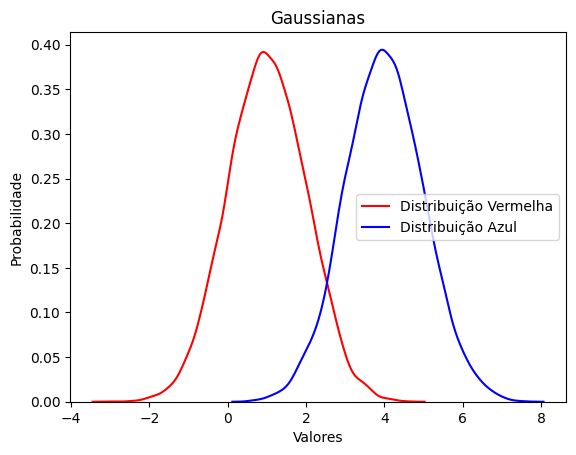

In [31]:
# Exibição das Gaussianas geradas a partir das distribuições normais criadas
sns.kdeplot(red_population, label='Distribuição Vermelha', color='red')
sns.kdeplot(blue_population, label='Distribuição Azul', color='blue')
plt.title('Gaussianas')
plt.xlabel('Valores')
plt.ylabel('Probabilidade')
plt.legend()
plt.show()

In [32]:
# Sorteia 100 sequências de três números e salva em lista
samples = dict()
counter = 1
sample_size = 3
samples_quantity = 100

for number in range(samples_quantity):
    # Seleciona os valores de forma aleatória
    sample = np.random.choice(blue_population, size=sample_size, replace=False)
    sample.sort()
    
    # Recupera o menor valor dos 3 (já que os outros 2 valores certamente teriam P-Value menor)
    sample_min = min(sample)
    
    # Normaliza o valor e calcula o P-Value
    standardized_sample_min = (sample_min - red_mean) / std
    p_value = (1 - s.norm.cdf(standardized_sample_min)) * 2
    
    samples[counter] = {'Sample': list(sample), 'Lowest Value': sample_min, 'P-Value of Lowest Value': p_value}
    counter += 1

print(j.dumps(
    samples,
    sort_keys=True,
    indent=4,
    separators=(',', ': ')
))

{
    "1": {
        "Lowest Value": 3.2485486439184452,
        "P-Value of Lowest Value": 0.02454122694434835,
        "Sample": [
            3.2485486439184452,
            4.148505028530532,
            5.505117603641423
        ]
    },
    "2": {
        "Lowest Value": 3.234381291314542,
        "P-Value of Lowest Value": 0.025457995625934204,
        "Sample": [
            3.234381291314542,
            4.497417548595279,
            4.6226626700064815
        ]
    },
    "3": {
        "Lowest Value": 4.354310883693707,
        "P-Value of Lowest Value": 0.0007956291829469553,
        "Sample": [
            4.354310883693707,
            5.467971277087824,
            6.287694880920949
        ]
    },
    "4": {
        "Lowest Value": 2.2842781491888315,
        "P-Value of Lowest Value": 0.19904464951425416,
        "Sample": [
            2.2842781491888315,
            3.70936926282553,
            4.286030045043646
        ]
    },
    "5": {
        "Lowest Value": 

In [33]:
# Verifica a quantidade de amostras que ficaram abaixo do limiar de 
limiar = 0.05
false_negatives = 0

for sample in samples.values():
    p_value = sample['P-Value of Lowest Value']
    if p_value > limiar:
        false_negatives += 1

print(f"Quantidade de falsos negativos: {false_negatives}.")
print(f"Taxa de falsos negativos: {false_negatives/samples_quantity:.0%}.")

Quantidade de falsos negativos: 43.
Taxa de falsos negativos: 43%.
